In [1]:
#Loading Packages

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

In [3]:
sns.set()

In [4]:
plt.style.use('ggplot')

In [5]:
#Loading Data
train = pd.read_csv('train_df.csv')
test = pd.read_csv('test_df.csv')

In [6]:
#Make a copy of original datasets
train_original = train.copy()
test_original = test.copy()

In [7]:
#check the head of the train dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#check the head of the train dataset
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
#check the shape of the train and test dataset
train.shape, test.shape

((614, 13), (367, 12))

In [10]:
#check the columns in the train dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
#check the description and informaiton about the dataframe for the type of column values

#train.describe      #same as train.info, see below
train.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes   

In [12]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [14]:
train.isnull().sum()
#train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

* Object types are the categorical features.
* Int and Float types are the Numerical features.

# Univariate Analysis:

It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.


In [16]:
#Analyzing the dependent variable

#Frequency table of a variable will give us the count of each category in that variable.
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [17]:
# Normalize can be set to True to print proportions instead of number for each category
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

* The loan of 422 (around 69%) people out of 614 were approved.

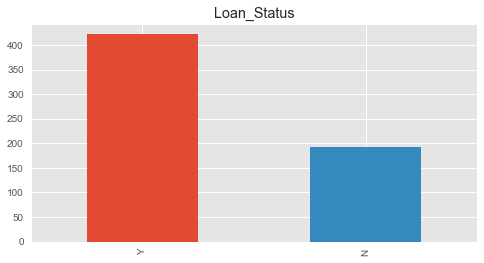

In [18]:
# Representing each category using bar plot
train['Loan_Status'].value_counts().plot.bar(figsize = (8,4),title= 'Loan_Status')

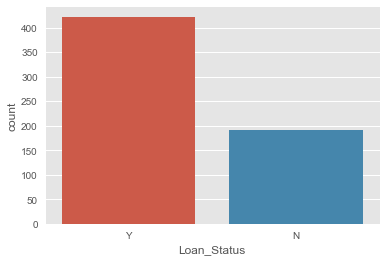

In [19]:
#alternatively this can be used
sns.countplot(x='Loan_Status',data=train)

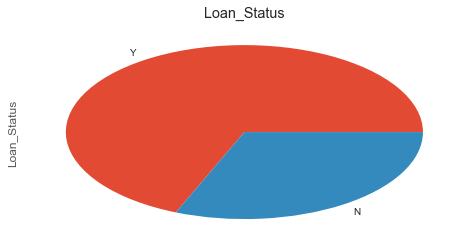

In [20]:
train['Loan_Status'].value_counts().plot.pie(figsize = (8,4),title= 'Loan_Status')

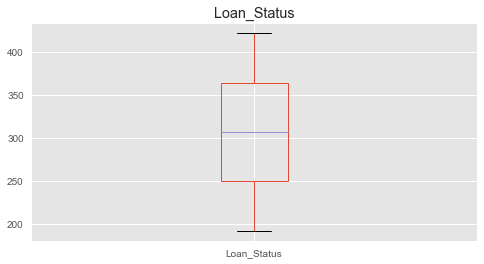

In [21]:
train['Loan_Status'].value_counts().plot.box(figsize = (8,4),title= 'Loan_Status')

### Visualize each variable separately 

* Different types of variables in our dataset are Categorical, ordinal and numerical.

<b>*Categorical features:*</b> These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

<b>*Ordinal features:*</b> Variables in categorical features having some order involved (Dependents, Education, Property_Area)

<b>*Numerical features:*</b> These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

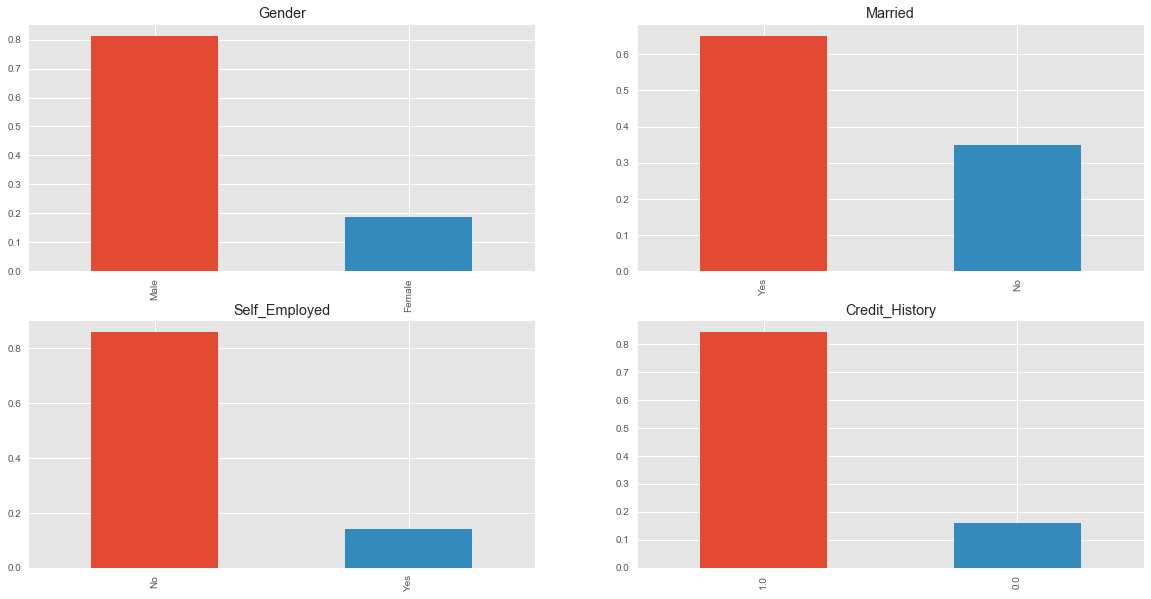

In [22]:
# Analyzing Independent Variable (Categorical)

plt.figure(figsize=(20,10))
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

### It can be inferred from the above bar plots that:

   * 80% applicants in the dataset are male.
   * Around 65% of the applicants in the dataset are married.
   * Around 15% applicants in the dataset are self employed.
   * Around 85% applicants have repaid their debts.

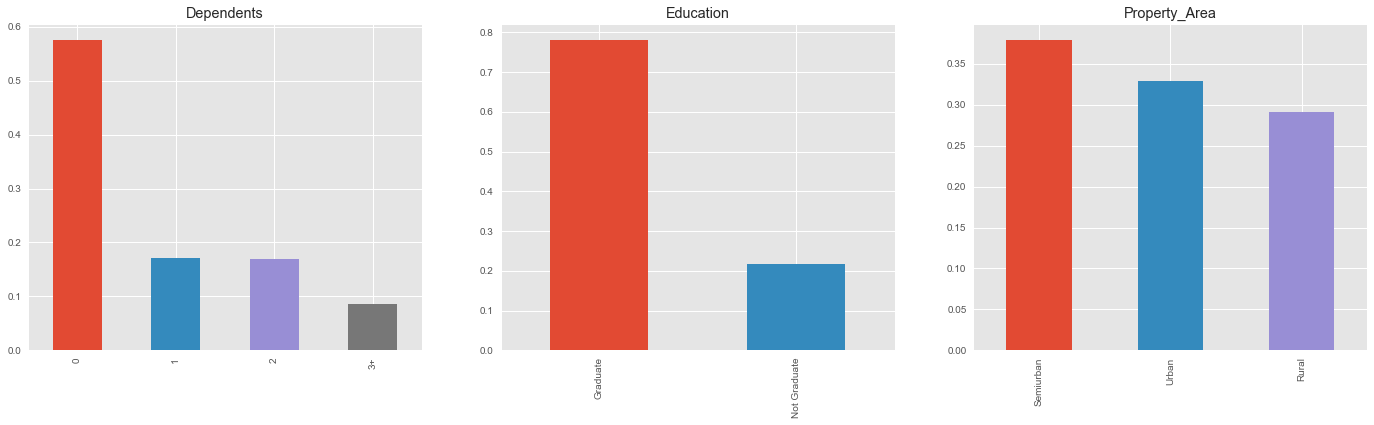

In [23]:
# Analyzing Independent Variable (Ordinal)

plt.figure(num= 1)
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')  
plt.show()

### Following inferences can be made from the above bar plots:

   * Most of the applicants don’t have any dependents.
   * Around 80% of the applicants are Graduate.
   * Most of the applicants are from Semiurban area.

#### Numerical values can be analyzed using the Distplot, Boxplot and Pairplot, see below.

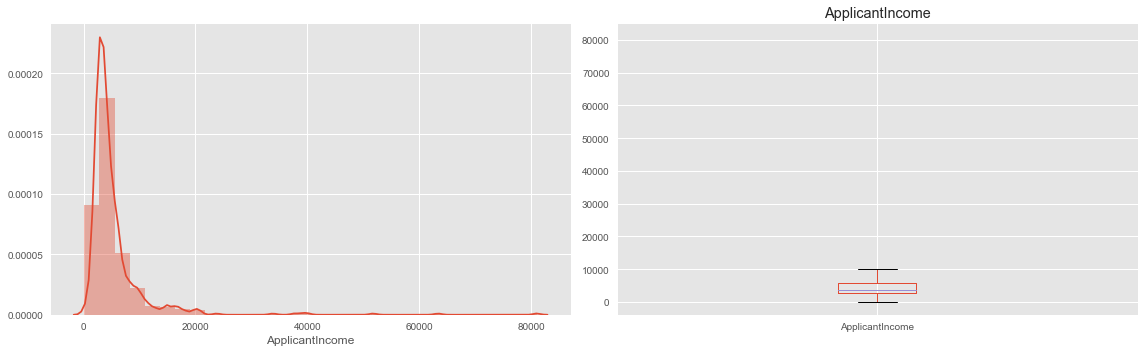

In [24]:
# Analyzing Independent Variable (Numerical)

plt.figure(num= 1,figsize=(16,5))
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'],bins=30)
##train['ApplicantIncome'].plot.density(figsize=(16,5))  # this can be used alternatively but prefer sns.distplot
plt.subplot(122) 
train['ApplicantIncome'].plot.box(title= 'ApplicantIncome') 
##train.boxplot(column='ApplicantIncome')                   # this can be used alternatively 
plt.tight_layout()
plt.show()

#### It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal later  as algorithms works better if the data is normally distributed.

#### The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.
#### Let's seggregate the boxplot data by Education.

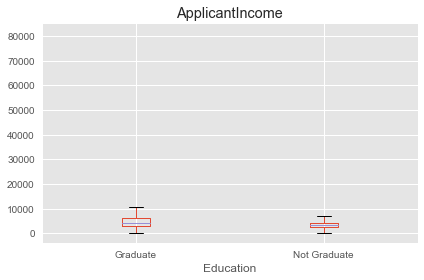

In [25]:
#train.boxplot(figsize=(20,6), by = 'Education')

train.boxplot(column='ApplicantIncome', by = 'Education') 
#train.boxplot(column='ApplicantIncome', by = 'Married')
#train.boxplot(column='ApplicantIncome', by = 'Self_Employed')
#train.boxplot(column='ApplicantIncome', by = 'Credit_History')
#train.boxplot(column='ApplicantIncome', by = 'Dependents')
#train.boxplot(column='ApplicantIncome', by = 'Property_Area')
plt.suptitle('')
plt.tight_layout()

#### We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

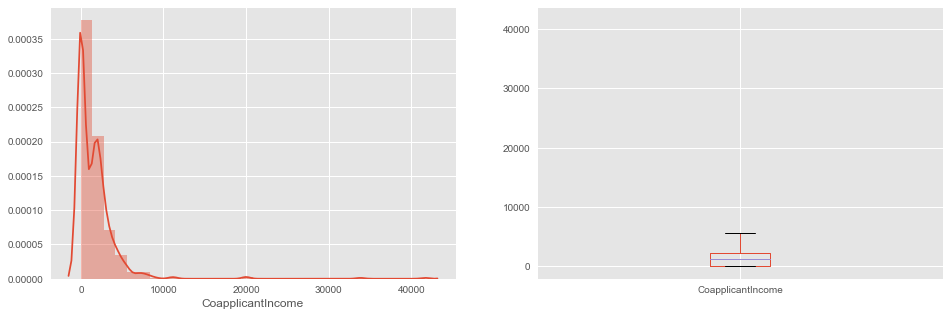

In [26]:
plt.figure(num= 1)
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome'],bins=30);
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5));
plt.show()

#### We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

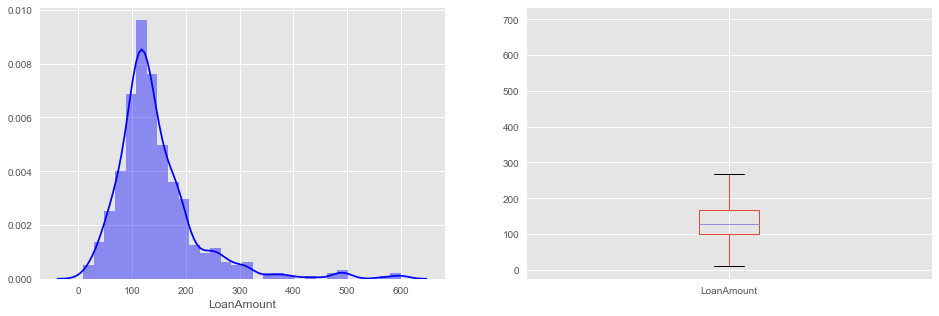

In [27]:
plt.figure(1) 
plt.subplot(121) 
#sns.distplot(train['LoanAmount'])  #--this doesn't work here as the data has NaN values(missing values)
df=train.dropna()                   #--so we drop the NaN values and then plot the numeric column values
sns.distplot(df['LoanAmount'],bins=30,color='b')
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

#### We see a lot of outliers in 'LoanAmount' is variable and the distribution is fairly normal. 

### Pairplot

#### Pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns only) and supports a color hue argument (for categorical columns). 

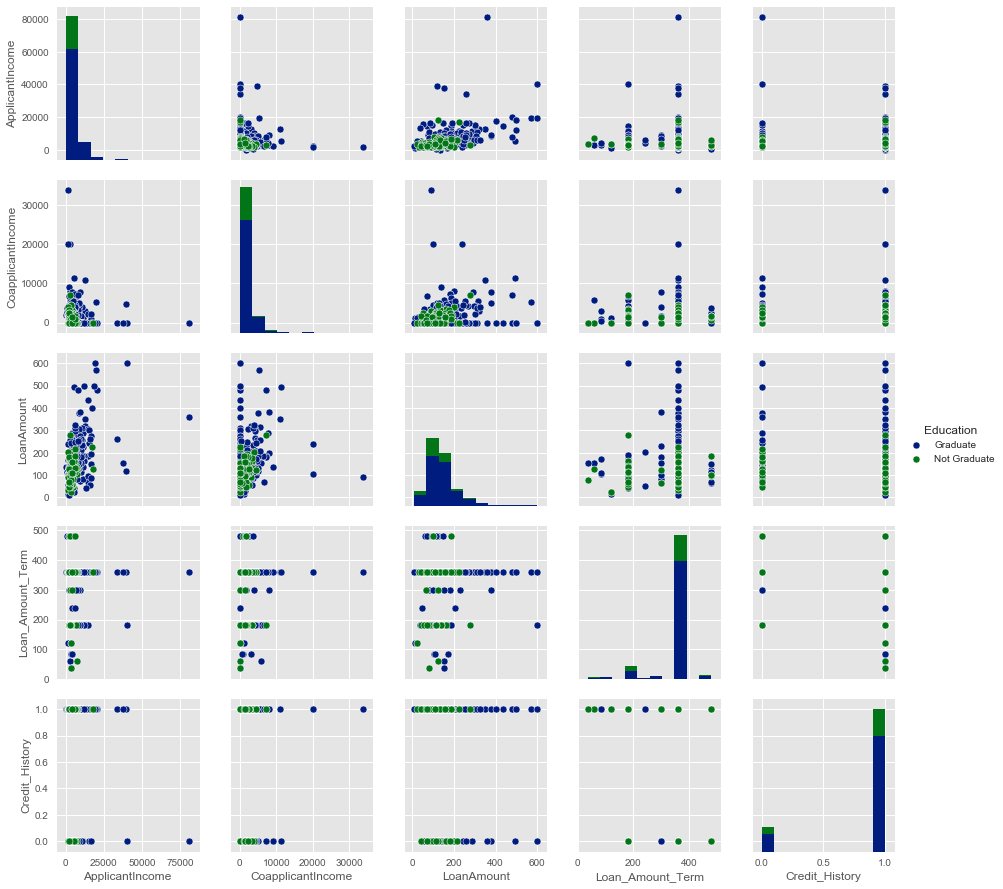

In [28]:
sns.pairplot(df,hue='Education',palette='dark')

# Bivariate Analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable. We would like to know how well each feature correlate with our target variable Loan Status. 

### Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

In [29]:
Gender=pd.crosstab(index=train['Gender'],columns=train['Loan_Status']) 
Gender
#Gender.sum(1).astype(float)
#Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
#plt.show()

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [30]:
Gender.sum(1).astype(float)

Gender
Female    112.0
Male      489.0
dtype: float64

In [31]:
75/112

0.6696428571428571

In [32]:
339/489

0.6932515337423313

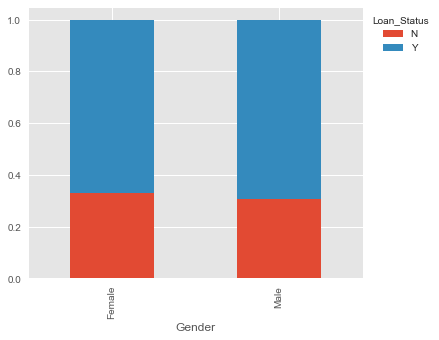

In [33]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5))
plt.legend(loc = 'upper left',bbox_to_anchor= (1,1),title='Loan_Status')
plt.show()

#### It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

#### Similarly plot for the remaining categorical features

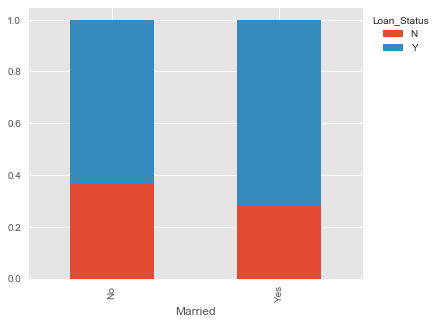

In [34]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1), loc='upper left',title='Loan_Status')
plt.show()

* <b>Proportion of married applicants is higher for the approved loans.</b>

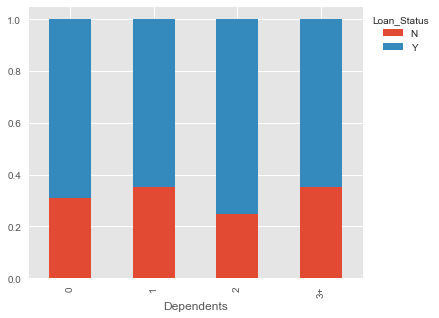

In [35]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5)) 
plt.legend(bbox_to_anchor=(1,1), loc='upper left',title='Loan_Status')
plt.show()

* <b>Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.</b>

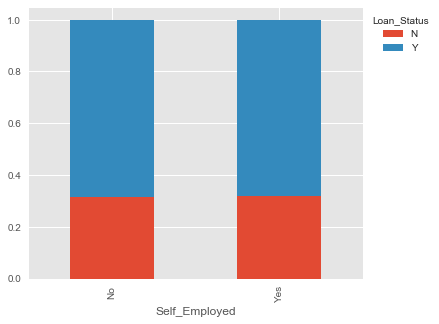

In [36]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5)) 
plt.legend(bbox_to_anchor=(1,1), loc='upper left',title='Loan_Status')
plt.show()

* <b>There is nothing significant we can infer from Self_Employed vs Loan_Status plot.</b>

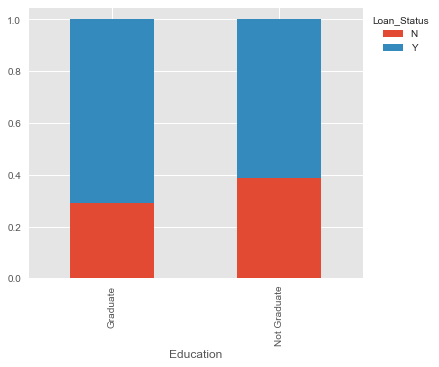

In [37]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1), loc='upper left',title='Loan_Status')
plt.show()

* <b>Proportion of graduate applicants is higher for the approved loans. This is obvious because Graduate applicants fall into the higher income bracket.</b>

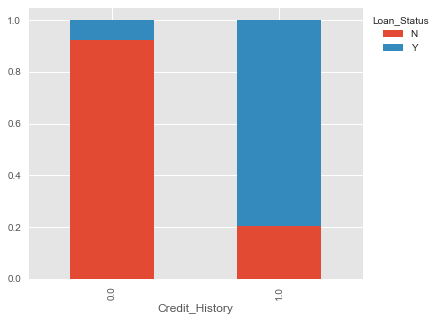

In [38]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1), loc='upper left',title='Loan_Status')
plt.show()

* <b>It seems people with credit history as 1 are more likely to get their loans approved. <b/>
* <b>Good credit history means good repayment capacity. </b>


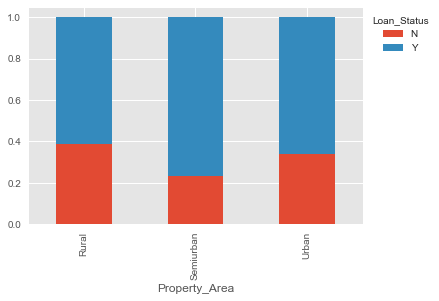

In [39]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.legend(bbox_to_anchor=(1,1), loc='upper left',title='Loan_Status')
plt.show()

* <b>Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.</b>

### Numerical Independent Variable vs Target Variable

#### ApplicantIncome vs Loan_Status
We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

In [40]:
train.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


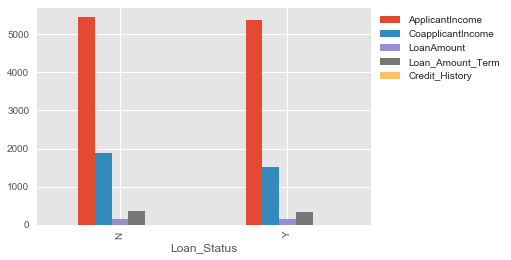

In [41]:
train.groupby('Loan_Status').mean().plot.bar()
plt.legend(bbox_to_anchor=(1,1),loc='upper left')

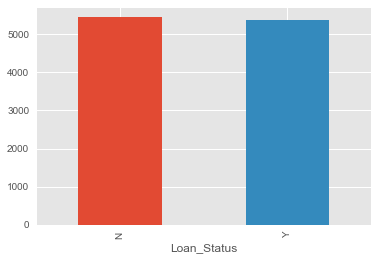

In [42]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

###### Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. <br/>So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [43]:
bins=[0,2500,4000,6000,8100]
groups=['Low','Average','High','Very High']

In [44]:
df.head(3)  #--dataframe without the nan values from our previous univariate analysis. 
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
train['Income_groups'] = pd.cut(df['ApplicantIncome'],bins=bins,labels=groups)

In [46]:
train['Income_groups'].value_counts()

Average      174
High         111
Low           83
Very High     44
Name: Income_groups, dtype: int64

In [47]:
train[['ApplicantIncome','Income_groups','Loan_Status']].head(n=4)

,ApplicantIncome,Income_groups,Loan_Status
0,5849,NaN,Y
1,4583,High,N
2,3000,Average,Y
3,2583,Average,Y


In [48]:
#Pandas Crosstab function drops the NaN values by default
Income_groups=pd.crosstab(index=train['Income_groups'],columns=train['Loan_Status'])
Income_groups

Loan_Status,N,Y
Income_groups,,
Low,26,57
Average,51,123
High,32,79
Very High,15,29


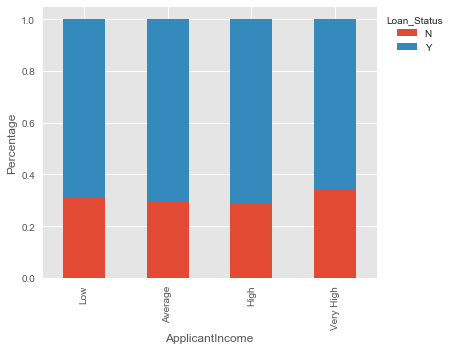

In [49]:
Income_groups.div(Income_groups.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()

#### It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

#### CoapplicantIncome vs Loan_Status

Now we will try to perform the similar analysis for the CoapplicantIncome as we have performed for the ApplicantIncome.

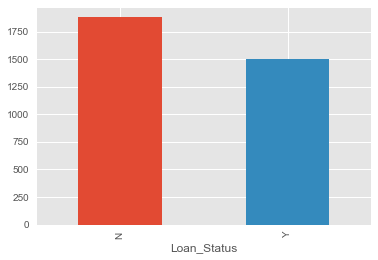

In [50]:
train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

##### Again here the y-axis shows the mean coapplicantincome which suggest that the co-applicants with the higher income have lower chances of loan approval, which contradicts our hypothesis. Let's try to treat this data similar to applicantincome by creating bins.

In [51]:
bins=[0,1000,3000,4200]
groups=['Low','Average','High']
train['Coapplicant_income_groups']=pd.cut(df['CoapplicantIncome'],bins,labels=groups)
train['Coapplicant_income_groups'].value_counts()

Average    169
High        37
Low         18
Name: Coapplicant_income_groups, dtype: int64

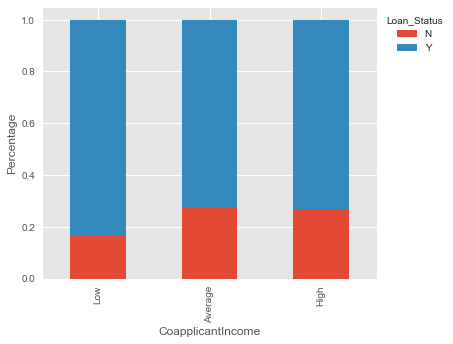

In [52]:
Coapplicant_income_groups = pd.crosstab(index=train['Coapplicant_income_groups'],columns=train['Loan_Status'])
Coapplicant_income_groups.div(Coapplicant_income_groups.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()

##### It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.
##### Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [53]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

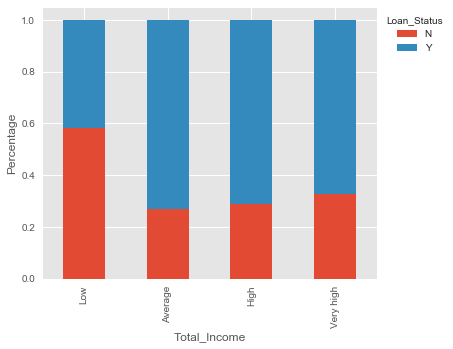

In [54]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_groups']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_groups=pd.crosstab(train['Total_Income_groups'],train['Loan_Status'])
Total_Income_groups.div(Total_Income_groups.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(6,5))
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()

##### We can now see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

#### LoanAmount vs Loan_Status

Now we will try to perform the similar analysis for the LoanAmount.

In [55]:
train['LoanAmount'].isnull().sum()

22

In [56]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

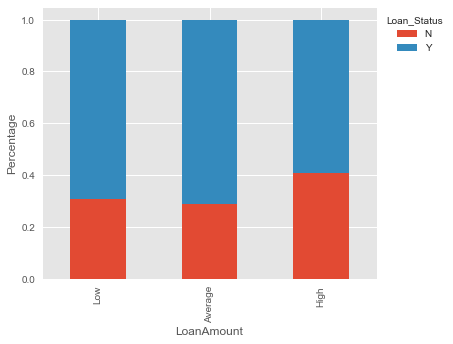

In [57]:
bins=[0,100,200,700]
groups=['Low','Average','High']
train['LoanAmount_groups'] = pd.cut(x=df['LoanAmount'],bins=bins,labels=groups)
LoanAmount_groups = pd.crosstab(index=train['LoanAmount_groups'],columns=train['Loan_Status'])
LoanAmount_groups.div(LoanAmount_groups.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.xlabel('LoanAmount')
p=plt.ylabel('Percentage')
plt.show()

#### It can be inferred that the proportions of Loan Approval is higher for the Low and Average Loan Amount as compared to higher Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

### We will now drop the bins we have created for the exploration purpose.

In [58]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_groups', 'Coapplicant_income_groups', 'Total_Income',
       'Total_Income_groups', 'LoanAmount_groups'],
      dtype='object')

In [59]:
train=train.drop(labels=['Income_groups','Coapplicant_income_groups',
                         'Total_Income','Total_Income_groups','LoanAmount_groups'],axis=1)
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### We will change the values '3+' in 'Dependents' variable to 3 to make it a numerical variable. We will make this change in both train and test sets.

In [60]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [61]:
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True)

In [62]:
train['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

#### Now we will convert the target variable’s ('Loan_Status') categories into 0 and 1 so that we can find its correlation with numerical variables. 
* We will replace N with 0 and Y with 1.
* One more reason to do so is few models like logistic regression takes only numeric values as input.

In [63]:
train['Loan_Status'] = train_original['Loan_Status']

In [64]:
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

In [65]:
train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [66]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

### Correlation between all the Numeric variables
* Heatmap is used to visualize the correlation.

In [67]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


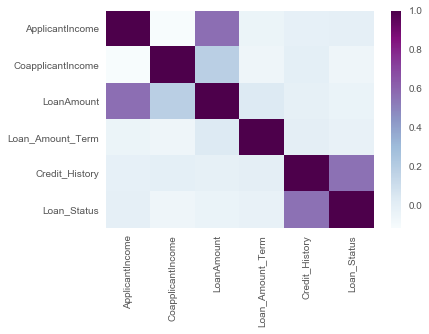

In [68]:
sns.heatmap(data=train.corr(),square=False, cmap='BuPu')

#### It can be infered that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). <br/>LoanAmount is also correlated with CoapplicantIncome.

## Missing values and outlier treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

In [69]:
#Let's check the feature wise count of missing values for the train dataframe first.
train.isnull().sum()
#train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History.
<br/>We can consider these methods to fill the missing values:
*  For numerical variables: imputation using mean or median
*  For categorical variables: imputation using mode

In [70]:
#once again check the data type of the features
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

#### There are missing values in Gender, Married, Dependents and Self_Employed features so we can fill them using the mode of the features.

In [71]:
#check the count before the imputation.
train['Gender'].describe()
#train['Gender'].value_counts()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [72]:
train['Gender'].mode()

0    Male
dtype: object

In [73]:
train['Gender'].mode()[0]

'Male'

In [74]:
#impute the missing values using the mode of the Gender feature.
train['Gender'].fillna(value=train['Gender'].mode()[0],inplace= True)

In [75]:
#check the missing values after imputation.
train['Gender'].isnull().sum()

0

In [76]:
#check the value_counts and unique count
train['Gender'].describe()
#train['Gender'].value_counts()

count      614
unique       2
top       Male
freq       502
Name: Gender, dtype: object

#### similarly we impute missing values with mode for others

In [77]:
train['Married'].fillna(train['Married'].mode()[0],inplace= True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace= True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace= True)

#### Although the credit_history is a numeric feature but the values in it are binary (1 or 0), so we will use the "mode" to imput these values.

In [78]:
#train['Credit_History'].describe()
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [79]:
train['Credit_History'].mode()[0]

1.0

In [80]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace= True)

#### Now we will impute the missing values for the numeric features 'LoanAmount' and 'Loan_Amount_Term'.

In [81]:
train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [82]:
#train['Loan_Amount_Term'].describe()
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

#### We can seen that the value of 360 is repeating the most in Loan_Amount_Term variable, so we will use the mode of this variable to replace the missing values.

In [83]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [84]:
#Let's check the value_counts for the 'LoanAmount' feature.

train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
128.0    11
113.0    11
130.0    10
96.0      9
95.0      9
70.0      8
115.0     8
112.0     8
150.0     7
135.0     7
136.0     7
132.0     7
125.0     7
104.0     7
80.0      6
81.0      6
138.0     6
90.0      6
158.0     6
116.0     6
175.0     6
144.0     6
155.0     6
180.0     6
152.0     5
         ..
315.0     1
101.0     1
73.0      1
142.0     1
48.0      1
164.0     1
83.0      1
191.0     1
166.0     1
495.0     1
59.0      1
214.0     1
240.0     1
72.0      1
42.0      1
349.0     1
280.0     1
405.0     1
279.0     1
304.0     1
650.0     1
436.0     1
78.0      1
54.0      1
89.0      1
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

#### We can see that the 'LoanAmount' feature is highly affected by the presence of lot of ouliers, so replacing the missing values by the mean() of the feature will not be the correct approach here.<br/> Thus to impute these missing values we will use the medain() of the feature.

In [85]:
train['LoanAmount'].median()

128.0

In [86]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace= True)

In [87]:
##Let's check again to confirm no missing values are not present.
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Handling the missing values in the test data in the same way as train set

In [88]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [89]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [90]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Handling Outliers in the data

Presence outliers in the data mostly has a significant effect on the mean and standard deviation and thus affects the distribution of the variable.

Due to the presence of outliers in the data, bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. Taking the log transformation, does not affect the smaller values much, but reduces the larger values. This makes the distribution of the data similar to normal distribution.

Visualize the effect of log transformation:

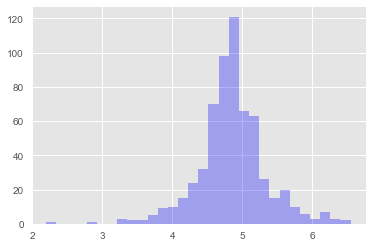

In [91]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=30,color='b', alpha=0.3) 

#### It can be seen that after applying the log transformation the distribution looks much closer to normal and the effect of outliers (extreme values) has been significantly reduced.

We will do the similar changes to the test file simultaneously.

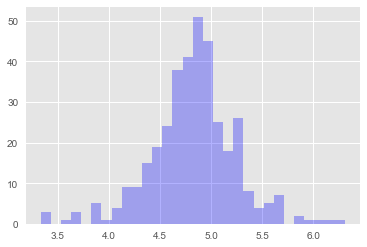

In [92]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=30,color='b', alpha=0.3) 

# MODEL BUILDING

#### Since the Loan_ID does not have any significance while the predicting the Loan Approval status, we will drop the Loan_ID feature from both the train and test datasaets

In [93]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

#### Now lets create the input and output from our train dataset to train the model. This is required as the scikit-learn (sklearn) requires the target (dependent) variable in a seperate dataset.

In [94]:
X = train.drop('Loan_Status', axis=1)   # input for building the model without the dependent variable.
y = train.Loan_Status             # output of the model - dependent variable.

In [95]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,5.587249
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,4.553877
7,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,5.062595
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,5.123964
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,5.855072


In [96]:
y

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
      ..
584    0
585    0
586    1
587    1
588    1
589    0
590    1
591    0
592    1
593    1
594    1
595    1
596    0
597    0
598    1
599    1
600    0
601    1
602    1
603    1
604    1
605    0
606    1
607    1
608    1
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### Encoding the Categorical Data

#### Since our train data contains the categorical features - Gender, Married, Education, Self_Employed and Property_Area  which have non-numeric data so we need to convert these features into the numeric before further processing as the machine learning algorithm works with numeric data.

In [97]:
#encoding the independent variables to be fitted to build the model.
X = pd.get_dummies(X) 
X.head()
#X.columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [98]:
#similarly we will encode the train and test data sets.
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

### Splitting the dataset into the Training set and Validation set

We will need to split our train dataset into training and validation sets. After training the model on the train part, we use the same model to make predictions for the validation part. 
The validation set is actually a part of the train dataset, which we will use to validate the prediction results with the actual results.

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X,y, test_size =0.3, random_state=0)

In [100]:
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((429, 21), (185, 21), (429,), (185,))

### Model building using the Logistic Regression:

#### Importing the Logistic Regression model

In [101]:
from sklearn.linear_model import LogisticRegression 

#### Fitting the Logistic Regression model to our train and validation set

In [102]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predicting the dependent variable (Loan_Status) for the validation set.

In [108]:
pred_validation = model.predict(X_validation)

In [109]:
pred_validation

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Calculating the confusion matrix and accuracy

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [112]:
#Confusion Matrix - is a matrix of the actual validation set outputs vs the predicted validation set outputs
cm = confusion_matrix(y_validation, pred_validation)
cm

array([[ 22,  29],
       [  2, 132]], dtype=int64)

In [113]:
#Accuracy
ac = accuracy_score(y_validation, pred_validation)
ac

0.8324324324324325

### Predicting the dependent variable (Loan_Status) for the test set.

In [114]:
pred_test = model.predict(test)
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

### Creating a new test csv file with the predicted 'Loan_Status' field.

In [123]:
test_LogisticReg = test_original

In [124]:
test_LogisticReg['Loan_Status'] = pred_test

In [127]:
test_LogisticReg

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,1
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,1
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,0
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,1
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,1


In [133]:
test_LogisticReg['Loan_Status'] = test_LogisticReg['Loan_Status'].map({1:'Y',0:'N'})

#### Finally exporting the test 'Loan_Status' of Logistic regression model to csv file

In [134]:
pd.DataFrame(data=test_LogisticReg).to_csv('test_LogisticReg.csv')